In [289]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [290]:
df = pd.read_csv("dataset.csv", low_memory=False)

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68965 entries, 0 to 68964
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   marka_pojazdu            68964 non-null  object 
 1   rok_produkcji            68749 non-null  float64
 2   moc                      68702 non-null  float64
 3   model_pojazdu            68964 non-null  object 
 4   skrzynia_biegow          47753 non-null  object 
 5   wersja                   43602 non-null  object 
 6   kraj_pochodzenia         68965 non-null  object 
 7   uszkodzony               3013 non-null   object 
 8   zarejestrowany_w_polsce  37980 non-null  object 
 9   generacja                46283 non-null  object 
 10  stan                     68749 non-null  object 
 11  rodzaj_lakieru           51057 non-null  object 
 12  bezwypadkowy             43380 non-null  object 
 13  rodzaj_paliwa            68729 non-null  object 
 14  l_miejsc              

In [292]:
df.corr()

,rok_produkcji,moc,l_miejsc,pojemnosc_skokowa,przebieg,srednie_spalanie,cena,l_drzwi
rok_produkcji,1.000000,0.217005,0.041601,-0.110400,-0.659066,0.019839,0.051188,0.222289
moc,0.217005,1.000000,-0.047654,0.810162,-0.187372,0.032695,0.083581,-0.175281
l_miejsc,0.041601,-0.047654,1.000000,-0.004875,0.090918,0.009031,-0.010417,0.316155
pojemnosc_skokowa,-0.110400,0.810162,-0.004875,1.000000,0.089379,0.027886,0.042035,-0.232292
przebieg,-0.659066,-0.187372,0.090918,0.089379,1.000000,-0.025668,-0.052376,-0.021068
srednie_spalanie,0.019839,0.032695,0.009031,0.027886,-0.025668,1.000000,0.002430,0.002616
cena,0.051188,0.083581,-0.010417,0.042035,-0.052376,0.002430,1.000000,-0.007960
l_drzwi,0.222289,-0.175281,0.316155,-0.232292,-0.021068,0.002616,-0.007960,1.000000


In [293]:
df["cena"] = df["cena"].fillna(-1)
# df["cena"] = df["cena"].astype("int")

In [294]:
average_cars = df[df["cena"].between(100, 2000000)]
average_cars.head(6)

,marka_pojazdu,rok_produkcji,moc,model_pojazdu,skrzynia_biegow,wersja,kraj_pochodzenia,uszkodzony,zarejestrowany_w_polsce,generacja,...,pojemnosc_skokowa,przebieg,czy_zabytek,kolor,srednie_spalanie,typ_nadwozia,cena,l_drzwi,naped,link
0,Volkswagen,2017.0,150.0,Tiguan,Automatyczna,2.0 TDI BMT SCR Comfortline DSG,Polska,NaN,Tak,II (2016-),...,1968.0,133000.0,NaN,czarny,0.0,SUV,103900.0,5.0,Na przednie koła,https://www.otomoto.pl/oferta/volkswagen-tigua...
1,BMW,2018.0,140.0,X1,Automatyczna,sDrive18i,Polska,NaN,Tak,F48 (2015-2022),...,1499.0,73216.0,NaN,czarny,0.0,SUV,112900.0,5.0,Na przednie koła,https://www.otomoto.pl/oferta/bmw-x1-sdrive18i...
2,Dacia,2022.0,100.0,Sandero Stepway,Manualna,NaN,Inny,NaN,NaN,NaN,...,999.0,10.0,NaN,złoty,0.0,Auta miejskie,77400.0,5.0,Na przednie koła,https://www.otomoto.pl/oferta/dacia-sandero-st...
3,Ford,2018.0,86.0,Focus,Manualna,1.6 Trend,Inny,NaN,NaN,Mk3 (2010-2018),...,1596.0,192763.0,NaN,NaN,0.0,Sedan,26500.0,4.0,NaN,https://www.otomoto.pl/oferta/ford-focus-ford-...
4,Toyota,2020.0,132.0,Corolla,Manualna,NaN,Polska,NaN,Tak,Seria E21 (2019-),...,1598.0,40572.0,NaN,niebieski,0.0,Sedan,79900.0,4.0,Na przednie koła,https://www.otomoto.pl/oferta/toyota-corolla-1...
5,Kia,2006.0,65.0,Picanto,Manualna,1.1 (els4),Niemcy,NaN,NaN,I (2004-2010),...,1086.0,150240.0,NaN,czarny,0.0,Auta małe,8999.0,5.0,Na przednie koła,https://www.otomoto.pl/oferta/kia-picanto-1-1p...


In [295]:
average_cars.describe()

,rok_produkcji,moc,l_miejsc,pojemnosc_skokowa,przebieg,srednie_spalanie,cena,l_drzwi
count,68739.000000,68692.000000,65681.000000,47238.000000,6.823600e+04,68739.000000,6.873900e+04,68411.000000
mean,2014.219410,168.024326,5.034911,1927.800690,1.313147e+05,0.180180,9.455770e+04,4.687506
std,6.480495,89.136404,0.703793,765.457066,9.509613e+04,1.122766,1.145036e+05,0.702737
min,1935.000000,1.000000,1.000000,400.000000,1.000000e+00,0.000000,1.400000e+03,2.000000
25%,2010.000000,114.000000,5.000000,1498.000000,5.000550e+04,0.000000,2.850000e+04,5.000000
50%,2015.000000,147.000000,5.000000,1910.000000,1.300000e+05,0.000000,5.790000e+04,5.000000
75%,2019.000000,190.000000,5.000000,1997.000000,1.976572e+05,0.000000,1.168500e+05,5.000000
max,2023.000000,900.000000,9.000000,8200.000000,1.830000e+06,20.000000,1.966770e+06,5.000000


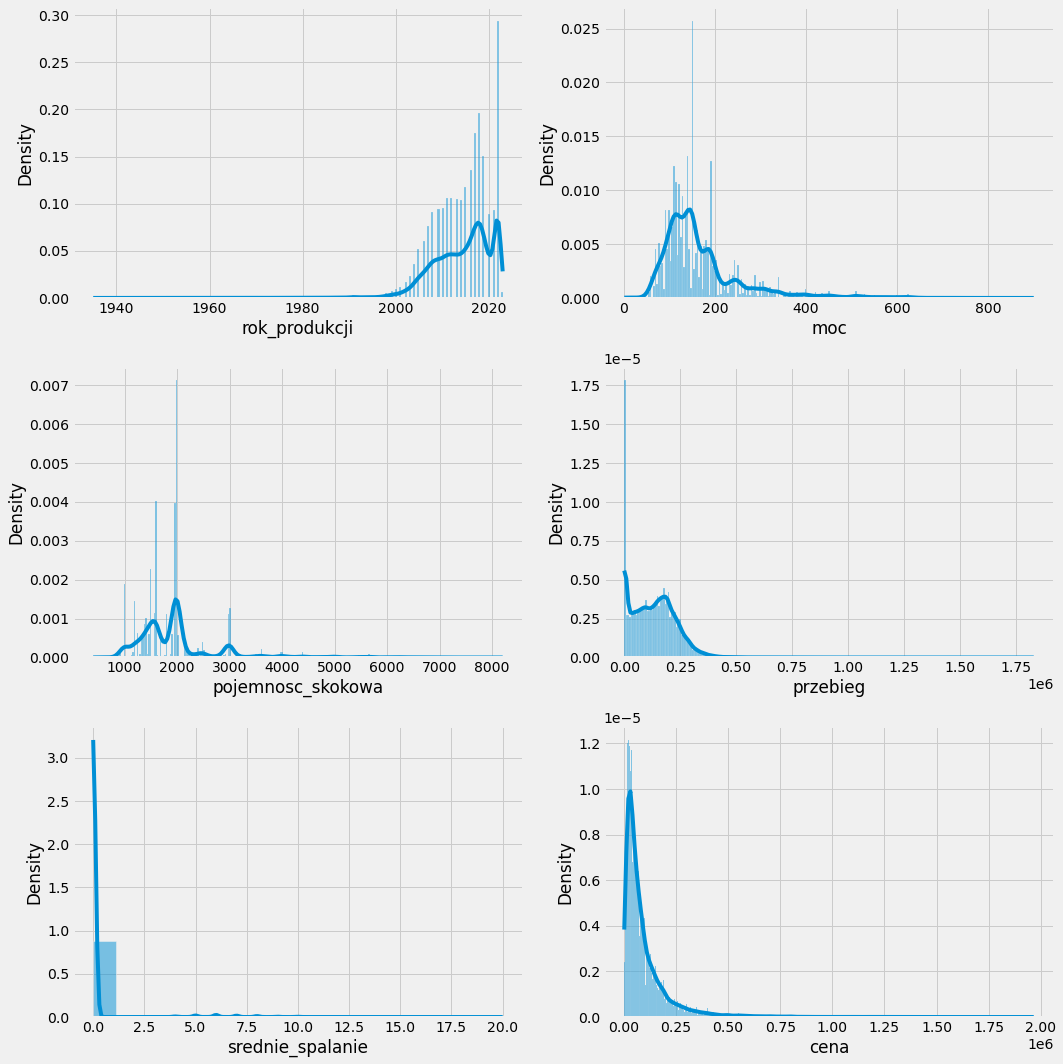

In [296]:
cols = ["rok_produkcji", "moc", "pojemnosc_skokowa", "przebieg", "srednie_spalanie", "cena"]


fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.ravel()  


for col, ax in zip(cols, axes):
    sns.histplot(data=average_cars[col], kde=True, stat='density', ax=ax)

fig.tight_layout()
plt.show()

# sns.displot(average_cars["cena"])

<AxesSubplot:>

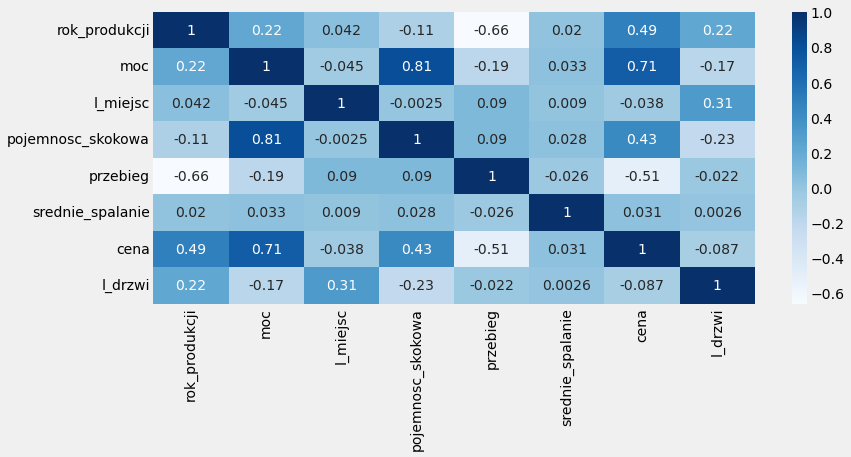

In [297]:
plt.figure(figsize=(12,5))
sns.heatmap(average_cars.corr(), annot=True, cmap="Blues")

In [298]:
average_cars.shape

(68739, 25)

In [299]:
average_cars[["cena", "rok_produkcji", "moc", "przebieg"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68739 entries, 0 to 68964
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cena           68739 non-null  float64
 1   rok_produkcji  68739 non-null  float64
 2   moc            68692 non-null  float64
 3   przebieg       68236 non-null  float64
dtypes: float64(4)
memory usage: 2.6 MB


In [300]:
average_cars = average_cars.dropna(subset=["moc", "rok_produkcji", "przebieg"])

### sklearn - regresja

In [301]:
X  = average_cars[["moc", "rok_produkcji", "przebieg"]]
y = average_cars["cena"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

l_reg = linear_model.LinearRegression()
l_reg.fit(X_train, y_train)

LinearRegression()

In [302]:
print('Coefficients: ', l_reg.coef_)
print('Variance score: {}'.format(l_reg.score(X_test, y_test)))

Coefficients:  [ 7.80223767e+02  3.08047524e+03 -3.28801439e-01]
Variance score: 0.6710099966501609


In [337]:
poly_reg=PolynomialFeatures(degree=3)
X_poly=poly_reg.fit_transform(X)
poly_reg.fit(X_poly,y)
p_reg=linear_model.LinearRegression()
p_reg.fit(X_poly,y)

LinearRegression()

In [338]:
# print('Coefficients: ', p_reg.coef_)
print('Variance score: {}'.format(p_reg.score(X_poly, y)))

Variance score: 0.7939873249767343


### statsmodels - regresja

In [340]:
mod = sm.OLS(y_train,X_train).fit()

print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cena   R-squared (uncentered):                   0.790
Model:                            OLS   Adj. R-squared (uncentered):              0.790
Method:                 Least Squares   F-statistic:                          6.005e+04
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                        0.00
Time:                        12:54:04   Log-Likelihood:                     -5.9807e+05
No. Observations:               47746   AIC:                                  1.196e+06
Df Residuals:                   47743   BIC:                                  1.196e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [341]:
y_pred = mod.predict(X_test)

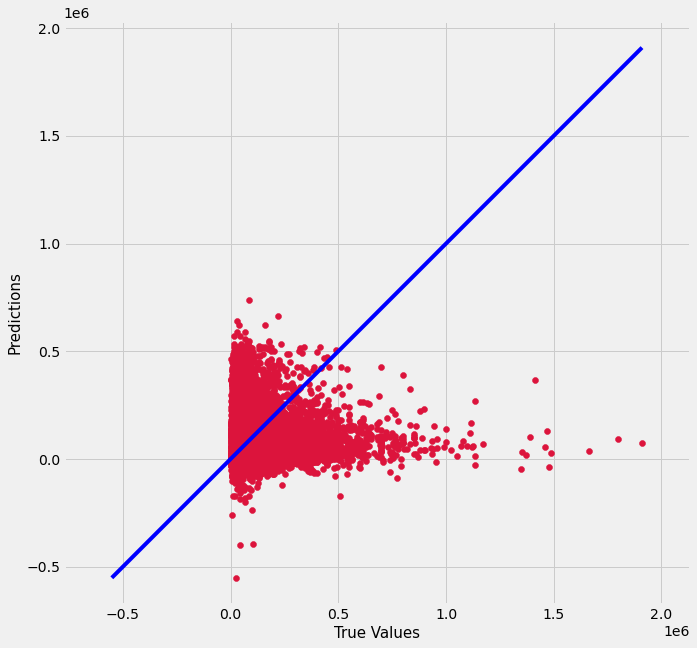

In [339]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c="crimson")

# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()